In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from scipy.integrate import odeint

Set up the figure, axis, and the plot element we want to animate:

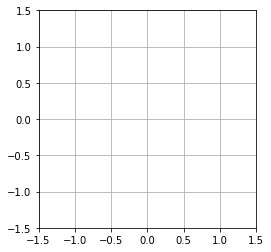

In [2]:
fig, ax = plt.subplots()

ax.set_aspect("equal")
ax.set_xlim((-1.5, 1.5))
ax.set_ylim((-1.5, 1.5))

ax.grid(True)

# Bob, string and text:
MyBob, = ax.plot([], [], "ro-", lw=2, zorder=2)
MyString, = ax.plot([], [], "k.-", lw=2, zorder=1)
MyText = ax.text(0, 0, '', transform=ax.transAxes)
# NOTE THE POSITION OF MyText!!!

Define the initialization function, which plots the background of each frame:

In [3]:
def init():
    MyBob.set_data([], [])
    MyString.set_data([], [])
    MyText.set_text('')
    return (MyBob, MyString, MyText)

Define the animation function, which is called for each new frame:

In [4]:
b = 0.25
c = 5.0
# values of these constants taken from:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

In [5]:
def SimplePendWithDissipation(var, t, b, c):
    theta, omega = var
    dvar_dt = [omega, -b*omega - c*np.sin(theta)]
    return dvar_dt

In [6]:
var0 = [1.+np.pi/2., 0.0] #IC of pendulum.

In [7]:
NumOfAnim = 501

In [8]:
t = np.linspace(0, 50, NumOfAnim)

In [9]:
%%time
sol = odeint(SimplePendWithDissipation, var0, t, args=(b, c))

CPU times: user 13.3 ms, sys: 266 µs, total: 13.6 ms
Wall time: 13.9 ms


In [10]:
def animate(i):
    
    x = np.cos(sol[i,0] - np.pi/2.)
    y = np.sin(sol[i,0] - np.pi/2.)
    
    xData = np.array([0, x])
    yData = np.array([0, y])
    
    MyBob.set_data(x, y)
    MyString.set_data(xData, yData)
    MyText.set_text('x={:.2f}, y={:.2f}'.format(x, y))
    
    return (MyBob, MyString, MyText)

Compile the animation. Setting ```blit=True``` will only redraw parts that have changed:

In [11]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(0, NumOfAnim),
                               interval=100,
                               blit=True, repeat=False)

In [12]:
%%time
HTML(anim.to_jshtml())

CPU times: user 31.1 s, sys: 780 ms, total: 31.9 s
Wall time: 33.3 s
